# PROYEK ANALISIS DATA: Bike-sharing-dataset

Sistem berbagi sepeda adalah generasi baru dari penyewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, dan pengembalian kembali telah menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan mengembalikannya kembali ke posisi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran pentingnya dalam lalu lintas, masalah lingkungan dan kesehatan. 

* Pertanyaan bisnis yang dapat diajukan:

1. Faktor apa saja yang dapat mempengaruhi pengguna dalam menyewa sepeda?
12. Pada waktu kapan terdapat penyewaan sepeda paling banyak dan paling sedikit?

In [1]:
# Mengimport library yang dibutuhkan
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from scipy import stats

In [2]:
# Load dataset penyewaan setiap harinya
df_day = pd.read_csv('day.csv')
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
# Melihat informasi dari dataset, seperti tipe data
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [5]:
# Melihat ada tidaknya missing value pada dataset
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Melihat ada tidaknya duplikasi pada dataset
df_day.duplicated(subset=['dteday']).sum()

0

In [7]:
# Mengubah beberapa nama column

df_day.rename(columns={'yr':'year', 'mnth': 'month', 'cnt': 'count'}, inplace=True)

In [8]:
# mengubah beberapa value dari column object

df_day['year'] = df_day['year'].replace({0:'2011', 1:'2012'})
df_day['dteday'] = df_day['dteday'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [9]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    object        
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [10]:
# mengubah beberapa data tipe dari kolom pada dataset
column_object = ['season', 'month', 'weekday', 'holiday', 'workingday', 'weathersit']

for col in column_object:
    df_day[col] = df_day[col].astype('object')

In [11]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   year        731 non-null    object        
 4   month       731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
# menghapus column instant karena merepresentasikan index yang sebenarnya sudah diprovide oleh pandas

df_day.drop('instant', axis=1, inplace=True)

In [13]:
df_day

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,2012,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,2012,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,2012,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,2012,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [14]:
# Melihat statistik descriptif pada setiap feature/column nummeric
df_day.describe(exclude='object', datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
dteday,731,2012-01-01 00:00:00,2011-01-01 00:00:00,2011-07-02 12:00:00,2012-01-01 00:00:00,2012-07-01 12:00:00,2012-12-31 00:00:00,NaN
temp,731.0,0.495385,0.05913,0.337083,0.498333,0.655417,0.861667,0.183051
atemp,731.0,0.474354,0.07907,0.337842,0.486733,0.608602,0.840896,0.162961
hum,731.0,0.627894,0.0,0.52,0.626667,0.730209,0.9725,0.142429
windspeed,731.0,0.190486,0.022392,0.13495,0.180975,0.233214,0.507463,0.077498
casual,731.0,848.176471,2.0,315.5,713.0,1096.0,3410.0,686.622488
registered,731.0,3656.172367,20.0,2497.0,3662.0,4776.5,6946.0,1560.256377
count,731.0,4504.348837,22.0,3152.0,4548.0,5956.0,8714.0,1937.211452


Berdasarkan hasil yang diberikan, dapat diketahui bahwasanya nilai tengah atau median dari cnt, yaitu total penyewaan sepeda berdasarkan kategori casual dan registered diperoleh sebesar 4548 dengan nilai minimum dan maksimum masing-masing sebesar 22 dan 8714. Kemudian untuk feature casual, diketahui nilai minimum sebesar 2, median sebesar 713, dan nilai maksimum sebesar 3410. Untuk feature registered, diketahui nilai minimum sebesar 20, median sebesar 3662, dan maksimum sebesar 6946. Berdasarkan nilai-nilai tersebut, dapat diketahui bahwa kebanyakan pengguna yang biasanya menyewa sepeda merupakan pengguna dengan kategori registered atau terdaftar.

In [15]:
df_day.describe(exclude='number', datetime_is_numeric=True).T[['count', 'unique', 'top', 'freq']]

,count,unique,top,freq
dteday,731,NaN,NaN,NaN
season,731.0,4.0,3.0,188.0
year,731,2,2012,366
month,731.0,12.0,1.0,62.0
holiday,731.0,2.0,0.0,710.0
weekday,731.0,7.0,6.0,105.0
workingday,731.0,2.0,1.0,500.0
weathersit,731.0,3.0,1.0,463.0


# Feature Selection

## Numerical

In [16]:
numeric_col = df_day.select_dtypes(include='number').copy()

In [17]:
numeric_col

,temp,atemp,hum,windspeed,casual,registered,count
0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,0.363478,0.353739,0.696087,0.248539,131,670,801
2,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...
726,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,0.255833,0.231700,0.483333,0.350754,364,1432,1796


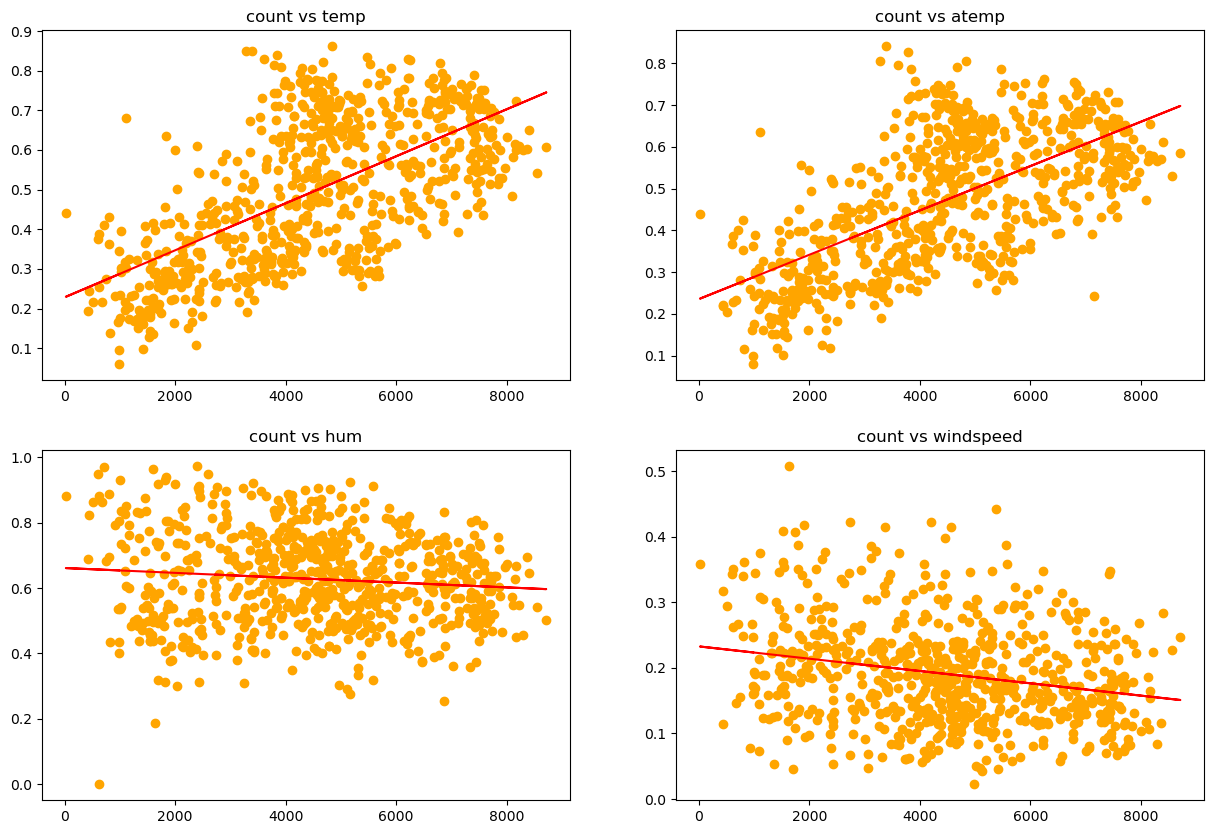

In [18]:
# melihat korelasi antar column numeric vs count

plt.figure(figsize=(15,10))

for i, col in enumerate(numeric_col.columns[:4]):
  ax = plt.subplot(2, 2, i+1)
  ax.set_title('count vs ' + col)
  plt.scatter(x=numeric_col['count'].values, y=numeric_col[col].values, color='orange')

  m, b = np.polyfit(numeric_col['count'].values, numeric_col[col].values, 1)
  plt.plot(numeric_col['count'].values, m * numeric_col['count'].values + b, color='red')


plt.show()

Berdasarkan visualisasi scatter plot yang diberikan , diketahui bahwasanya feature temp dan atemp memilki korelasi positif terhadap feature count

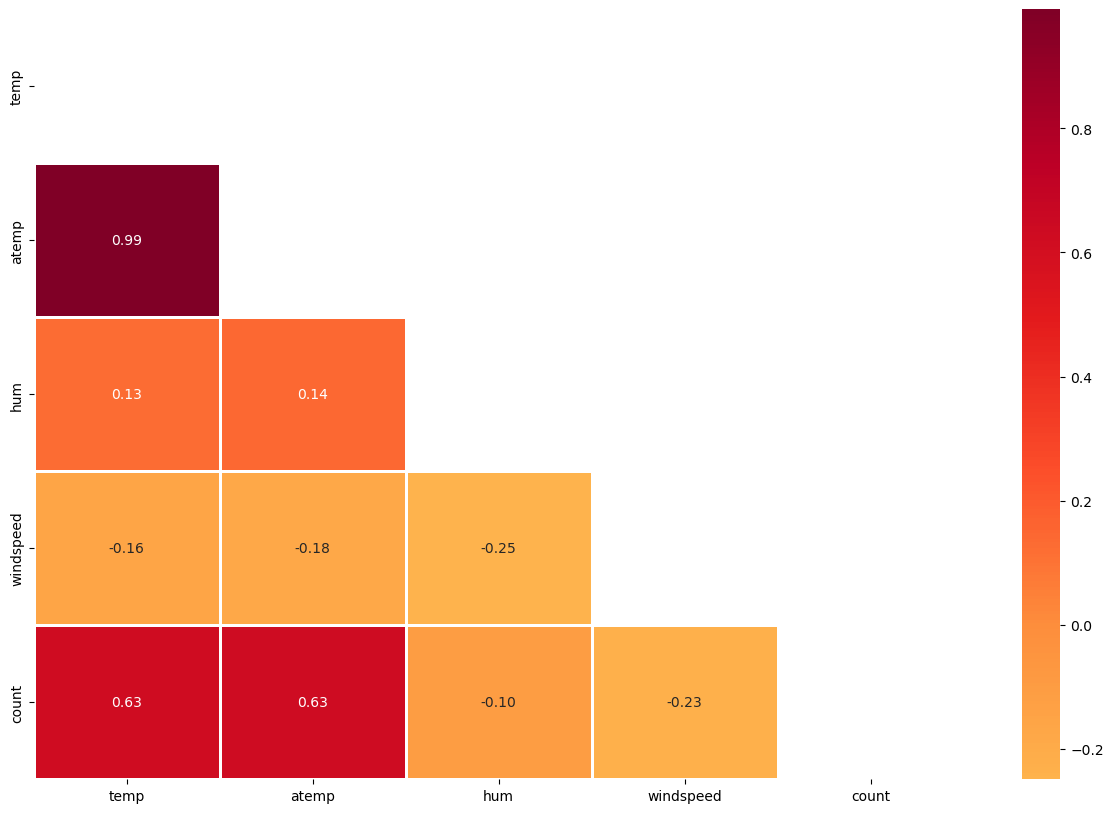

In [19]:
# membuat visualisasi heatmap

corr = numeric_col[['temp', 'atemp', 'hum', 'windspeed', 'count']].copy().corr()

mask = np.triu(np.ones_like(corr, dtype=bool))


plt.figure(figsize=(15, 10))
sns.heatmap(corr, mask=mask, center=0, cmap='YlOrRd', linewidths=1, annot=True, fmt='.2f')
plt.show()

Berdasarkan visualisasi heatmap di atas dapat diketahui bahwasanya feature temp dan atemp memiliki korelasi yang positif terhadap feature count dengan besar yang sama, yaitu 0.63. Menariknya, feature temp dan atemp memiliki korelasi yang hampir sempurna, maka dari itu kita bisa mengambil salah satu dari keduanya untuk dianalisis lebih lanjut. Berdasarkan visualisasi tersebut, kita bisa menyimpulkan bahwa mungkin feature atau column temp mempengaruhi feature count atau banyaknya penyewa sepeda.

## Categorical

In [20]:
categorical_col = pd.concat([df_day.select_dtypes(include='object').copy(), df_day[['count']]], axis=1)

In [21]:
categorical_col

,season,year,month,holiday,weekday,workingday,weathersit,count
0,1,2011,1,0,6,0,2,985
1,1,2011,1,0,0,0,2,801
2,1,2011,1,0,1,1,1,1349
3,1,2011,1,0,2,1,1,1562
4,1,2011,1,0,3,1,1,1600
...,...,...,...,...,...,...,...,...
726,1,2012,12,0,4,1,2,2114
727,1,2012,12,0,5,1,2,3095
728,1,2012,12,0,6,0,2,1341
729,1,2012,12,0,0,0,1,1796


In [22]:
# melihat signifikansi feature-feature yang ada pada categorial column dengan feature count

anova_check = {}

for col in ['season', 'holiday', 'workingday', 'weathersit']:


    grouped_data = [categorical_col['count'][categorical_col[col] == group] for group in categorical_col[col].unique()]
    anova_statistic, p_value = stats.f_oneway(*grouped_data)

    anova_check.setdefault('Feature',[]).append(col)
    anova_check.setdefault('anova_statistic',[]).append(anova_statistic)
    anova_check.setdefault('p-value',[]).append(p_value)
    anova_check.setdefault('alpha',[]).append('0.05')
    anova_check.setdefault('significant result',[]).append('Yes' if p_value < 0.05 else 'No')

anova_result = pd.DataFrame(data = anova_check)
anova_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
anova_result

,Feature,anova_statistic,p-value,alpha,significant result
0,season,128.769622,6.720391e-67,0.05,Yes
1,weathersit,40.066045,3.106317e-17,0.05,Yes
2,holiday,3.421441,6.475936e-02,0.05,No
3,workingday,2.736742,9.849496e-02,0.05,No


- If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.

- If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.

Berdasarkan ANOVA F-Test, dapat diketahui bahwasanya feature season dan weathersit memiliki signifikansi terhadap feature count berdasarkan evaluasi dari p-value. Dapat disimpulkan bahwa kemungkinan banyaknya jumlah penyewa sepeda dipengaruhi oleh season dan weathersit, maka dari itu untuk kedua feature tersebut akan dianalisis lebih lanjut.

# EDA

## Numerical

### Temperature

- temp : Normalized temperature in Celsius. The values are divided to 41 (max)

In [23]:
temp = df_day[['dteday', 'temp', 'season','casual', 'registered', 'count']].copy()

In [24]:
temp

,dteday,temp,season,casual,registered,count
0,2011-01-01,0.344167,1,331,654,985
1,2011-01-02,0.363478,1,131,670,801
2,2011-01-03,0.196364,1,120,1229,1349
3,2011-01-04,0.200000,1,108,1454,1562
4,2011-01-05,0.226957,1,82,1518,1600
...,...,...,...,...,...,...
726,2012-12-27,0.254167,1,247,1867,2114
727,2012-12-28,0.253333,1,644,2451,3095
728,2012-12-29,0.253333,1,159,1182,1341
729,2012-12-30,0.255833,1,364,1432,1796


In [25]:
# melakukan konversi nilai normalisasi temp ke nilai aktual

temp['temp'] = temp['temp'].apply(lambda x: x*41)

In [26]:
temp['temp'].describe()

count    731.000000
mean      20.310776
std        7.505091
min        2.424346
25%       13.820424
50%       20.431653
75%       26.872076
max       35.328347
Name: temp, dtype: float64

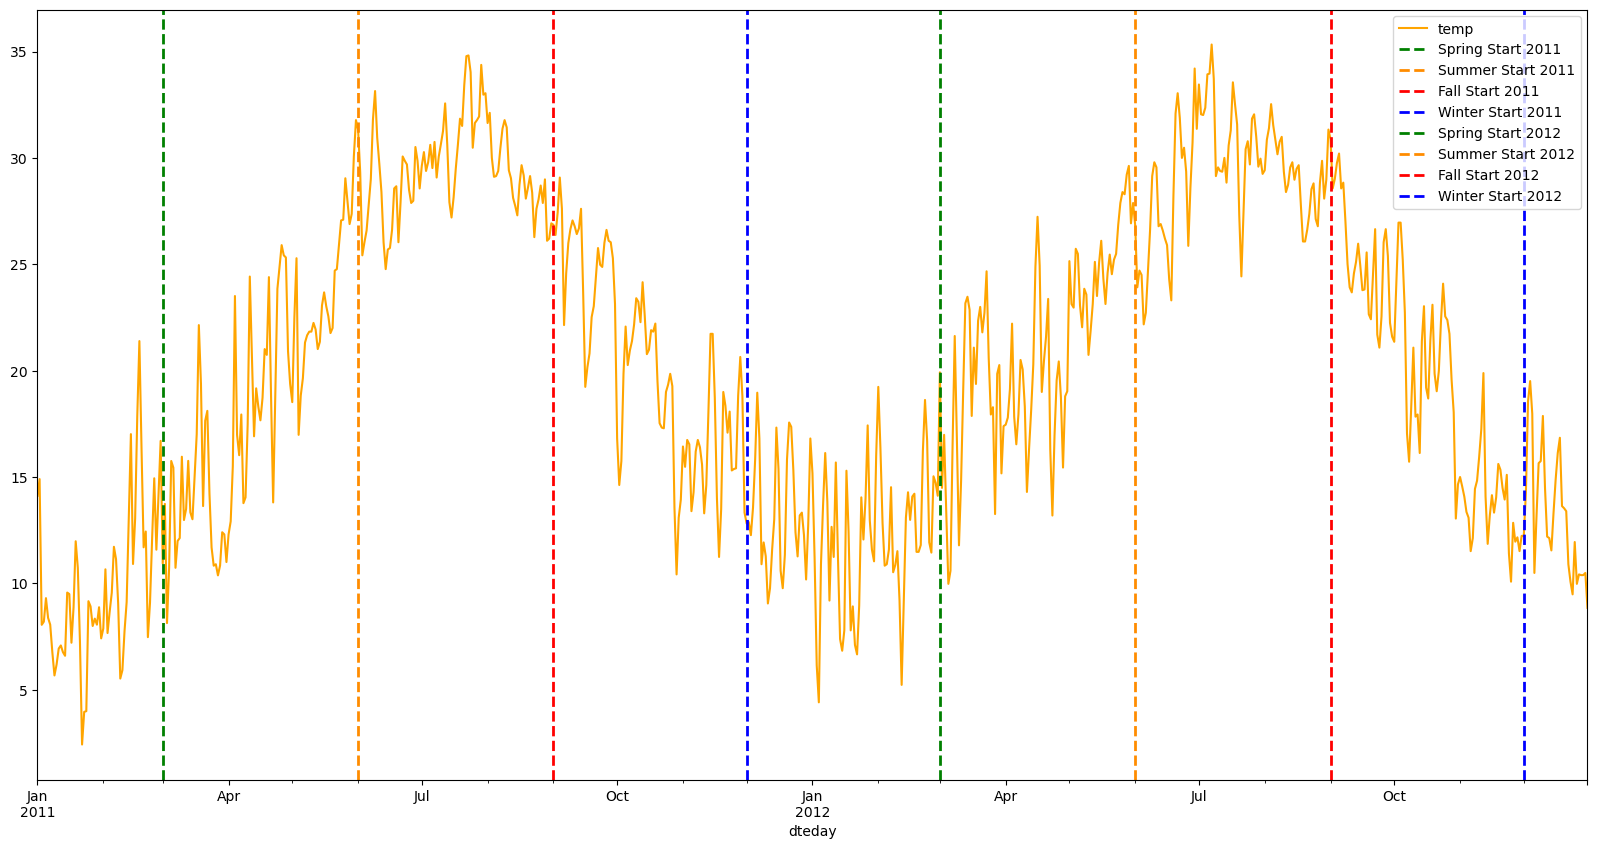

In [27]:
temp.plot(x='dteday', y='temp', color='orange', figsize=(20, 10))


for i in ['2011', '2012']:
    spring_start = pd.to_datetime(i + '-03-01')
    summer_start = pd.to_datetime(i + '-06-01')
    fall_start = pd.to_datetime(i + '-09-01')
    winter_start = pd.to_datetime(i + '-12-01')

    plt.axvline(spring_start, color='green', linestyle='--', linewidth=2, label='Spring Start ' + i)
    plt.axvline(summer_start, color='darkorange', linestyle='--', linewidth=2, label='Summer Start ' + i)
    plt.axvline(fall_start, color='red', linestyle='--', linewidth=2, label='Fall Start ' + i)
    plt.axvline(winter_start, color='blue', linestyle='--', linewidth=2, label='Winter Start ' + i)

plt.legend()
plt.show()

Berdasarkan visualisasi di atas, dapat kita lihat bahwa tentu saja nilai maksimum pada feature temp berada pada season summer dan nilai minimum pada feature temp berada pada season winter

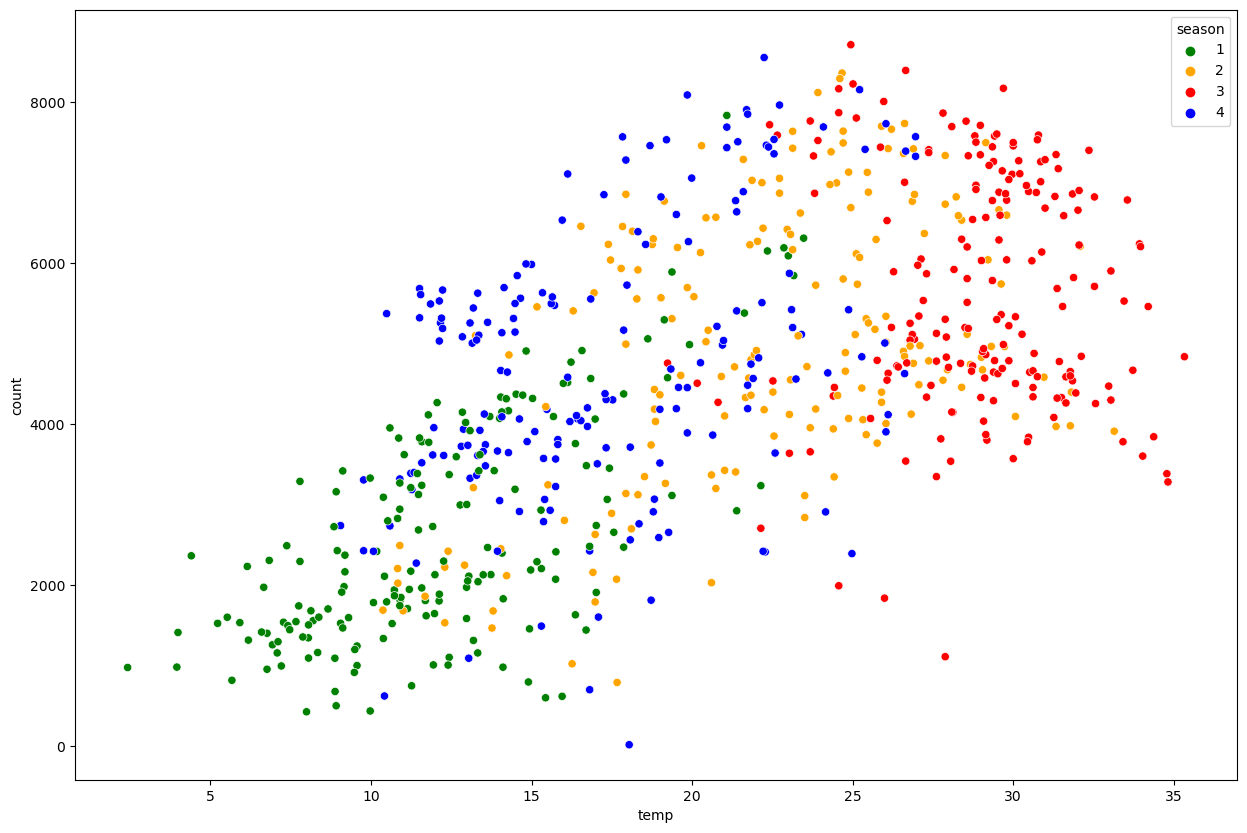

In [28]:
custom_palette = {1: 'green', 2: 'orange', 3: 'red', 4: 'blue'}


plt.figure(figsize=(15, 10))
sns.scatterplot(x='temp', y='count', hue='season' ,data=temp, palette=custom_palette)
plt.show()

In [29]:
temp[['temp', 'count']][(temp['count'] == temp['count'].max()) | (temp['count'] == temp['count'].min())]

,temp,count
623,24.941653,8714
667,18.040000,22


Berdasarkan visualisasi serta table di atas dapat diketahui bahwa jumlah maksimum dari penyewaan sepeda terjadi ketika suhu berada di 24.941653 celcius sedangkan jumlah minimum dari penyewaan sepeda terjadi ketika suhu berada di 18.040000 celcius

## Categorical

### Season

In [30]:
# Mengambil feature season untuk dilakukan EDA
season = df_day['season'].copy().astype('object')

In [31]:
season.unique()

array([1, 2, 3, 4], dtype=object)

Feature season memiliki 4 kategori dengan masing-masing kategori merepresentasikan hal berikut:

* 1:springer 
* 2:summer
* 3:fall
* 4:winter

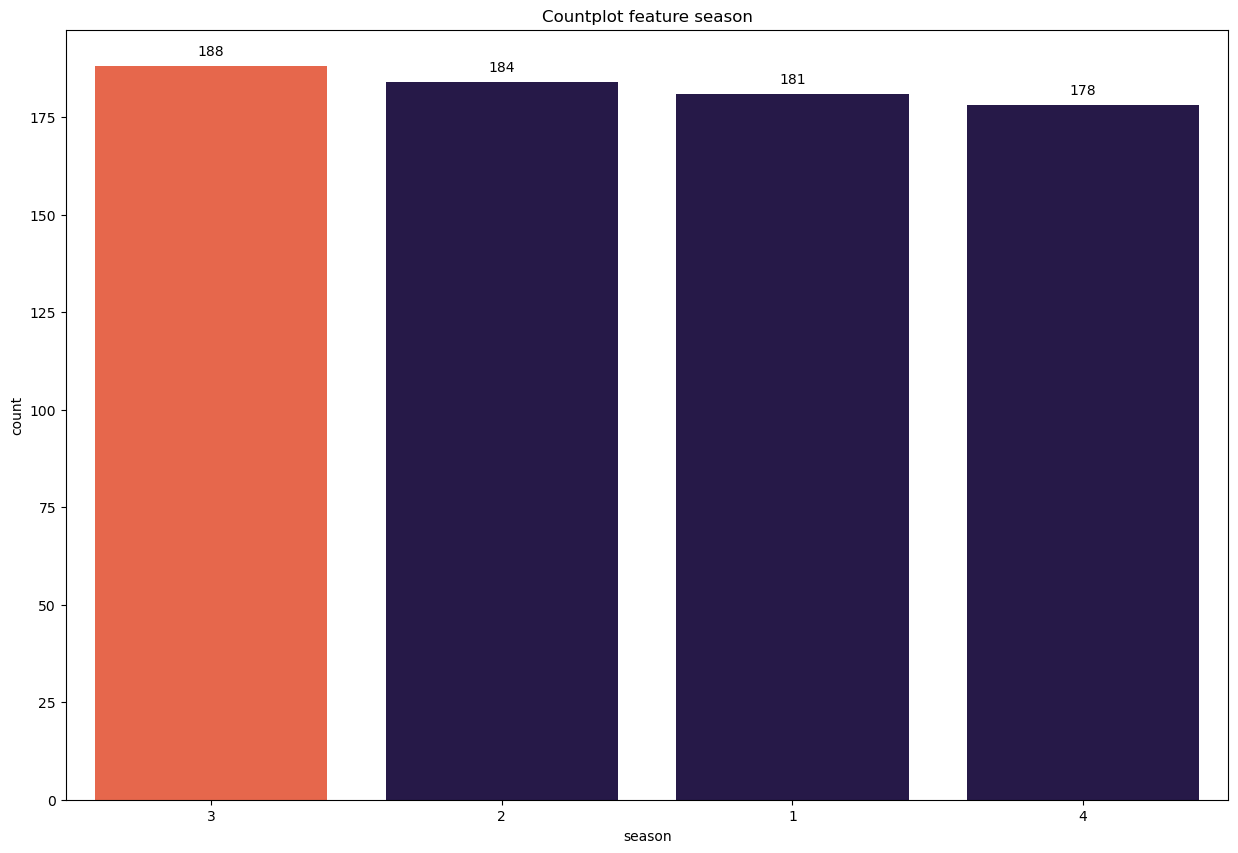

In [32]:
# Visualisasi bar chart pada feature season untuk melihat jumlah pada masing-masing kategori season
custom_order = season.value_counts().index

strong_color = '#FF5733'

palette = [strong_color if cat == custom_order[0] else sns.color_palette("magma")[0] for cat in custom_order]

plt.figure(figsize=(15, 10))
plt.title('Countplot feature season')
sns.countplot(x=season, order=custom_order, palette=palette)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 2, int(p.get_height()), ha='center', va='bottom', fontsize=10, color='black')
plt.show()

Berdasarkan visualisasi yang ditampilkan, dapat diperoleh insight bahwasanya jumlah kategori terbanyak pada season adalah kategori 3, yaitu "fall" atau musim gugur

In [33]:
# Membuat pivot table untuk feature season dan cnt
season_group = df_day[['season', 'count']].copy().groupby(by='season').agg({'count':'sum'})

In [34]:
season_group = season_group.sort_values(by='count', ascending=False)

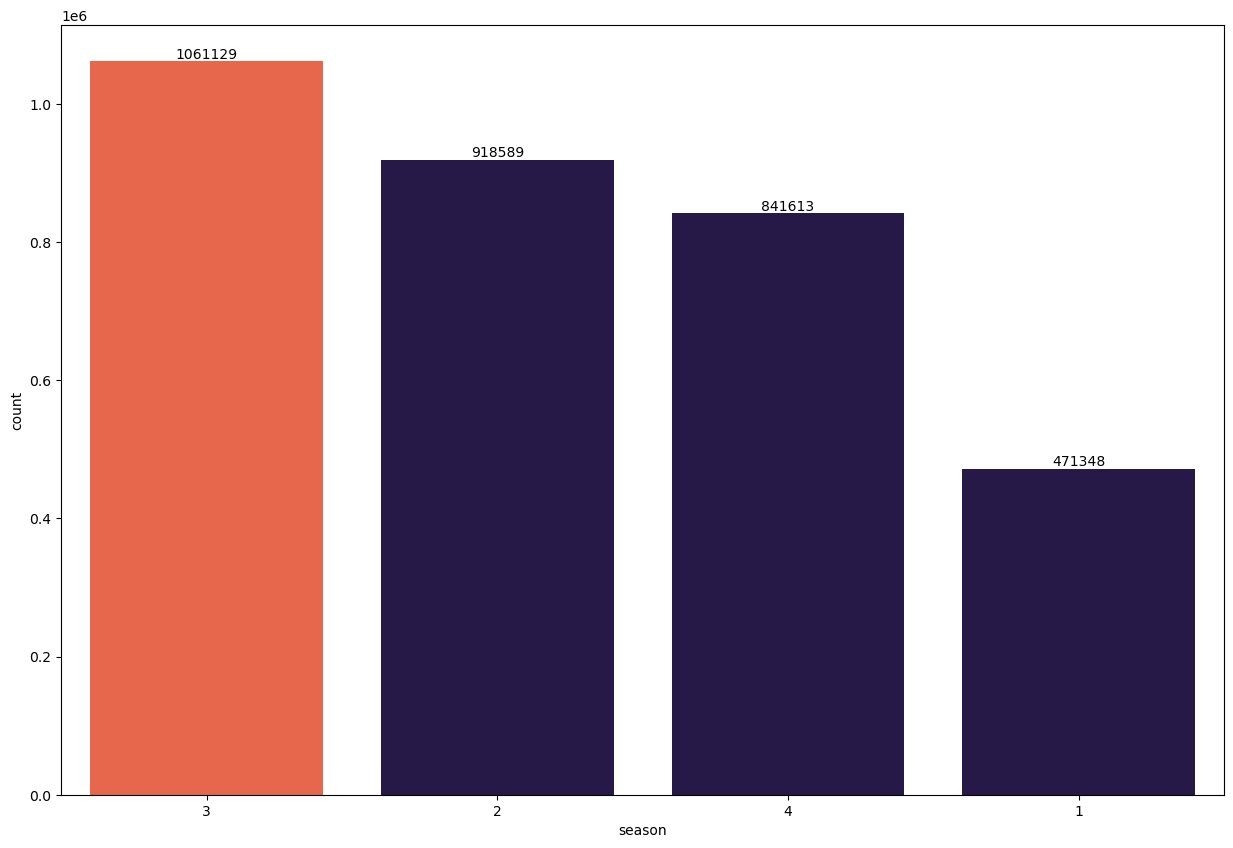

In [35]:
custom_order = season_group.index

strong_color = '#FF5733'

palette = [strong_color if cat == custom_order[0] else sns.color_palette("magma")[0] for cat in custom_order]

plt.figure(figsize=(15, 10))
sns.barplot(data=season_group, y='count', x=season_group.index, order=custom_order, palette=palette)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 2, int(p.get_height()), ha='center', va='bottom', fontsize=10, color='black')
plt.show()

Berdasarkan visualisasi bar plot, dapat diketahui bahwa kategori season 3, yaitu "fall" atau musim gugur memiliki jumlah penyewaan sepeda perhari terbanyak sepanjang record dari dataset. Kemudian, meskipun kategori 1 memiliki jumlah record yang lebih banyak dibandingkan dengan kategori 4, jumlah penyewaan sepeda perhari dari kategori 4 lebih banyak dari kategori 1

### Weathersit

In [36]:
# Mengambil feature weatersit untuk dilakukan EDA
weathersit = df_day['weathersit'].copy().astype('object')

In [37]:
weathersit.unique()

array([2, 1, 3], dtype=object)

Feature weathersit memiliki 4 kategori dengan masing-masing kategori merepresentasikan hal berikut:

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

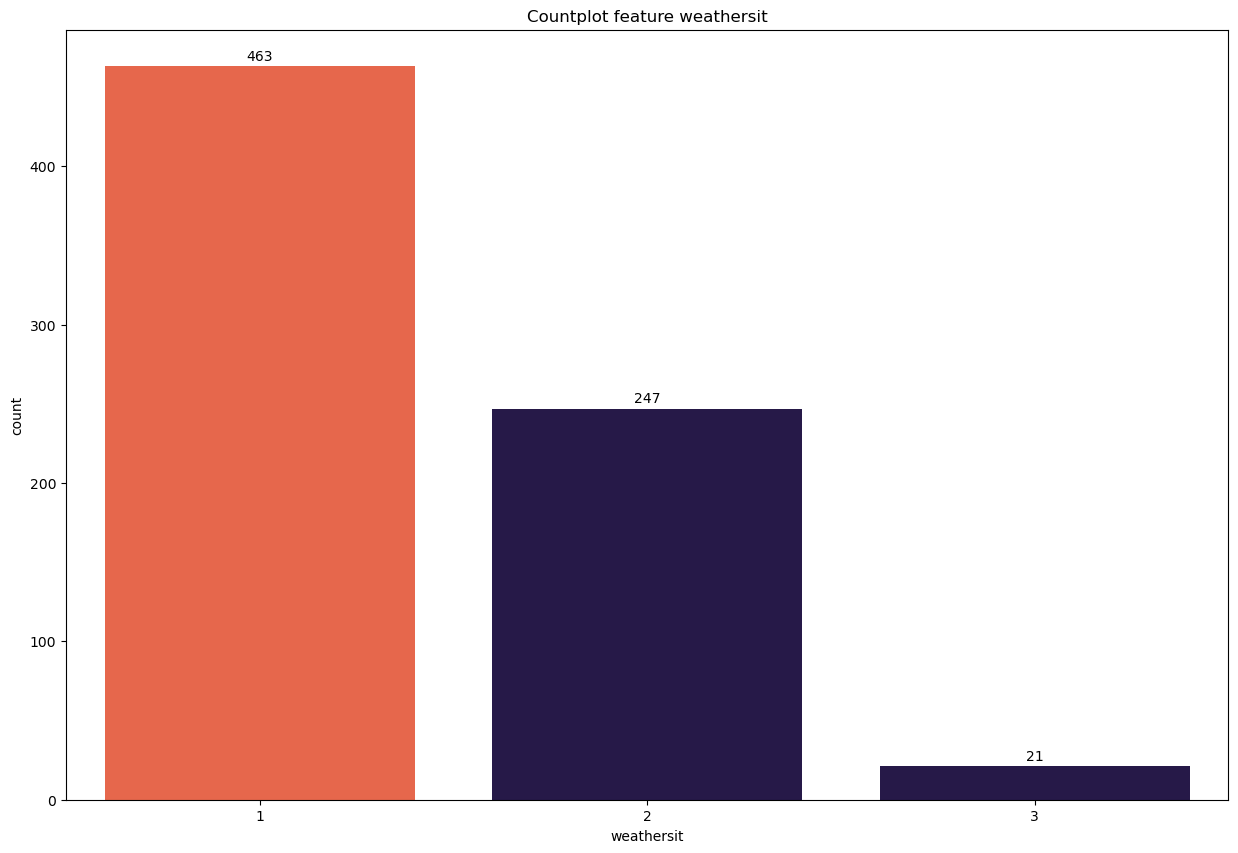

In [39]:
# Visualisasi bar chart pada feature weathersit untuk melihat jumlah pada masing-masing kategori weathersit
custom_order = weathersit.value_counts().index

strong_color = '#FF5733'

palette = [strong_color if cat == custom_order[0] else sns.color_palette("magma")[0] for cat in custom_order]

plt.figure(figsize=(15, 10))
plt.title('Countplot feature weathersit')
sns.countplot(x=weathersit, order=custom_order, palette=palette)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 2, int(p.get_height()), ha='center', va='bottom', fontsize=10, color='black')
plt.show()

Berdasarkan visualisasi yang ditampilkan, dapat diperoleh insight bahwasanya jumlah kategori terbanyak pada weathersit adalah kategori 1, yaitu "Clear, Few clouds, Partly cloudy, Partly cloudy"

In [40]:
# Membuat pivot table untuk feature weathersit dan count
weathersit_group = df_day[['weathersit', 'count']].copy().groupby(by='weathersit').agg({'count':'sum'})

In [41]:
weathersit_group = weathersit_group.sort_values(by='count', ascending=False)

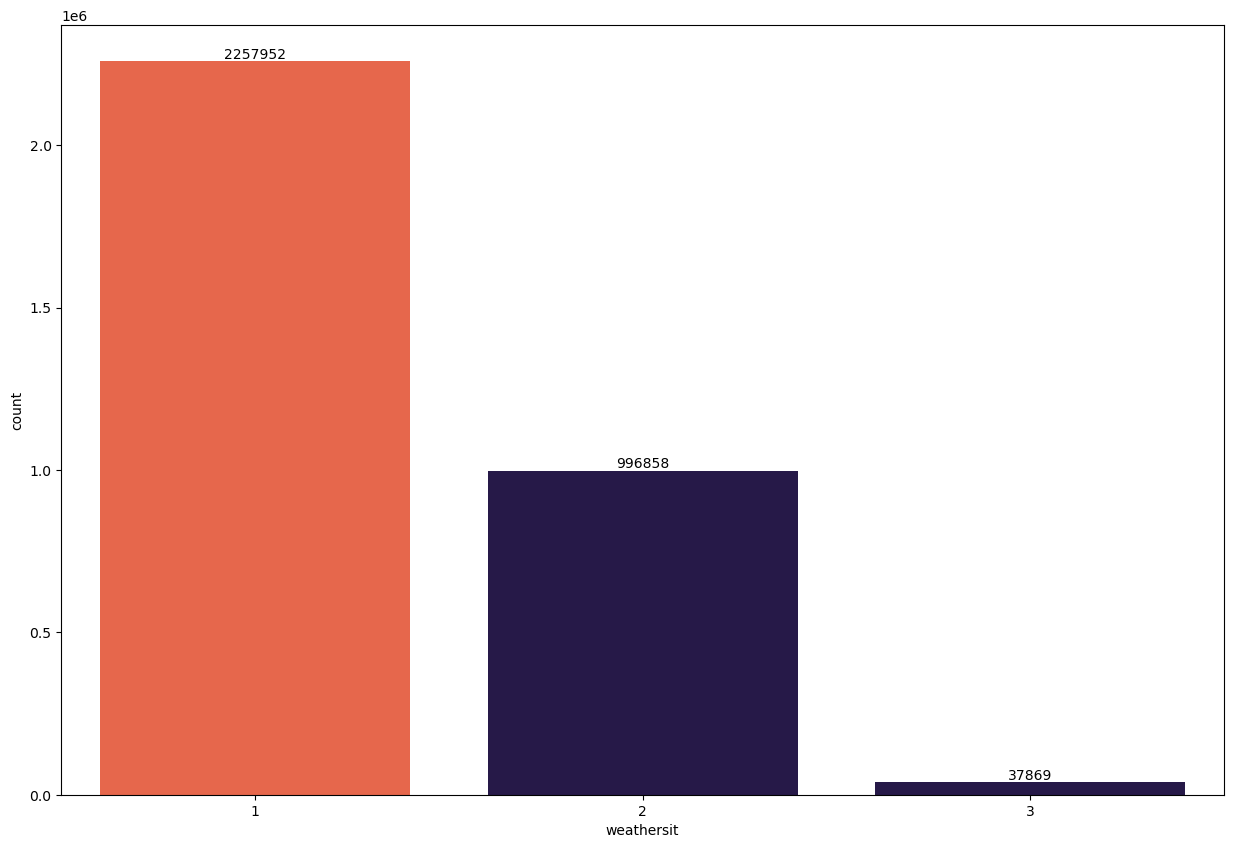

In [42]:
custom_order = weathersit_group.index

strong_color = '#FF5733'

palette = [strong_color if cat == custom_order[0] else sns.color_palette("magma")[0] for cat in custom_order]

plt.figure(figsize=(15, 10))
sns.barplot(data=weathersit_group, y='count', x=weathersit_group.index, order=custom_order, palette=palette)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 2, int(p.get_height()), ha='center', va='bottom', fontsize=10, color='black')
plt.show()

Berdasarkan visualisasi bar plot, dapat diketahui bahwa kategori weathersit 1, yaitu "Clear, Few clouds, Partly cloudy, Partly cloudy" memiliki jumlah penyewaan sepeda perhari terbanyak sepanjang record dari dataset.

# Conclusion

In [43]:
df_day['temp'] = df_day['temp'].apply(lambda x: x*41)

In [44]:
month_rent = df_day[['year', 'month', 'season', 'weathersit', 'temp','casual', 'registered', 'count']].copy().groupby(['year', 'month', 'season', 'weathersit']).agg({
    'temp': 'mean',
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
})

In [45]:
month_rent

temp  casual  registered  count
year month season weathersit                                      
2011 1     1      1            6.959597    1543       19461  21004
                  2            9.542659    1496       15183  16679
                  3            8.917500      34         472    506
     2     1      1           11.887674    5386       29804  35190
                  2           10.943356     856       12169  13025
...                                 ...     ...         ...    ...
2012 12    1      1           10.489153     977        4355   5332
                  2           10.694797    2324       12511  14835
                  3            9.976653       9         432    441
           4      1           14.885273    4164       46794  50958
                  2           14.554996    5771       46376  52147

[76 rows x 4 columns]

In [46]:
month_rent_fix = month_rent.reset_index()

In [47]:
month_rent_fix

,year,month,season,weathersit,temp,casual,registered,count
0,2011,1,1,1,6.959597,1543,19461,21004
1,2011,1,1,2,9.542659,1496,15183,16679
2,2011,1,1,3,8.917500,34,472,506
3,2011,2,1,1,11.887674,5386,29804,35190
4,2011,2,1,2,10.943356,856,12169,13025
...,...,...,...,...,...,...,...,...
71,2012,12,1,1,10.489153,977,4355,5332
72,2012,12,1,2,10.694797,2324,12511,14835
73,2012,12,1,3,9.976653,9,432,441
74,2012,12,4,1,14.885273,4164,46794,50958


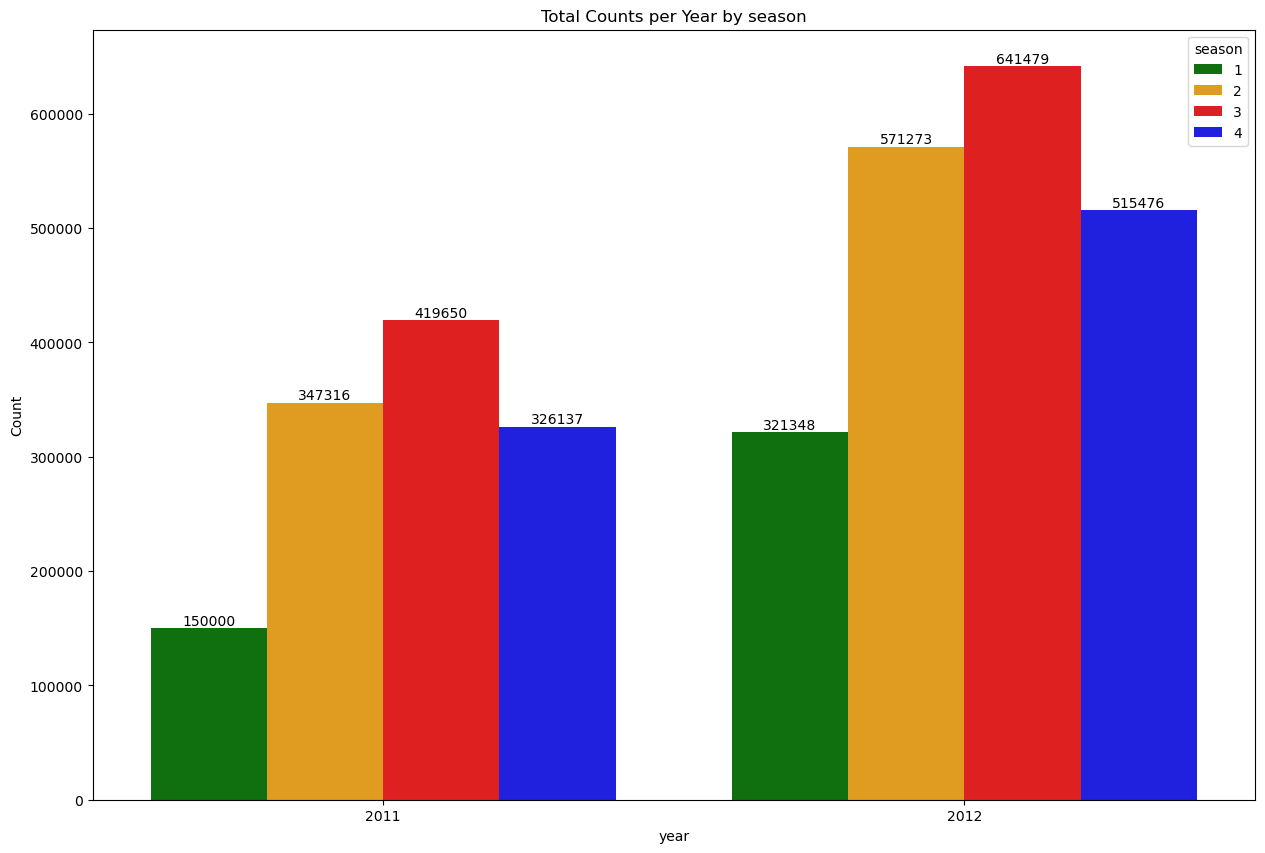

In [49]:
plt.figure(figsize=(15, 10))

ax = sns.barplot(x='year', y='count', hue='season', data=month_rent_fix, errorbar=None, palette=custom_palette, estimator=sum)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 2, int(p.get_height()), ha='center', va='bottom', fontsize=10, color='black')

# Set title and labels
plt.title('Total Counts per Year by season')
plt.xlabel('year')
plt.ylabel('Count')

# Show the plot
plt.show()

Berdasarkan visualisasi di atas, dapat diketahui bahwasanya jumlah penyewa sepeda terbanyak dari keseluruhan yang ada pada dataset, yaitu ketika ada di season 3 atau "fall" pada tahun 2012. Dan setiap tahunnya juga, dapat diketahui bahwasanya ketika pada season 1 atau 'spring', penyewa sepeda jauh lebih sedikit dibandingkan season-season lainnya.

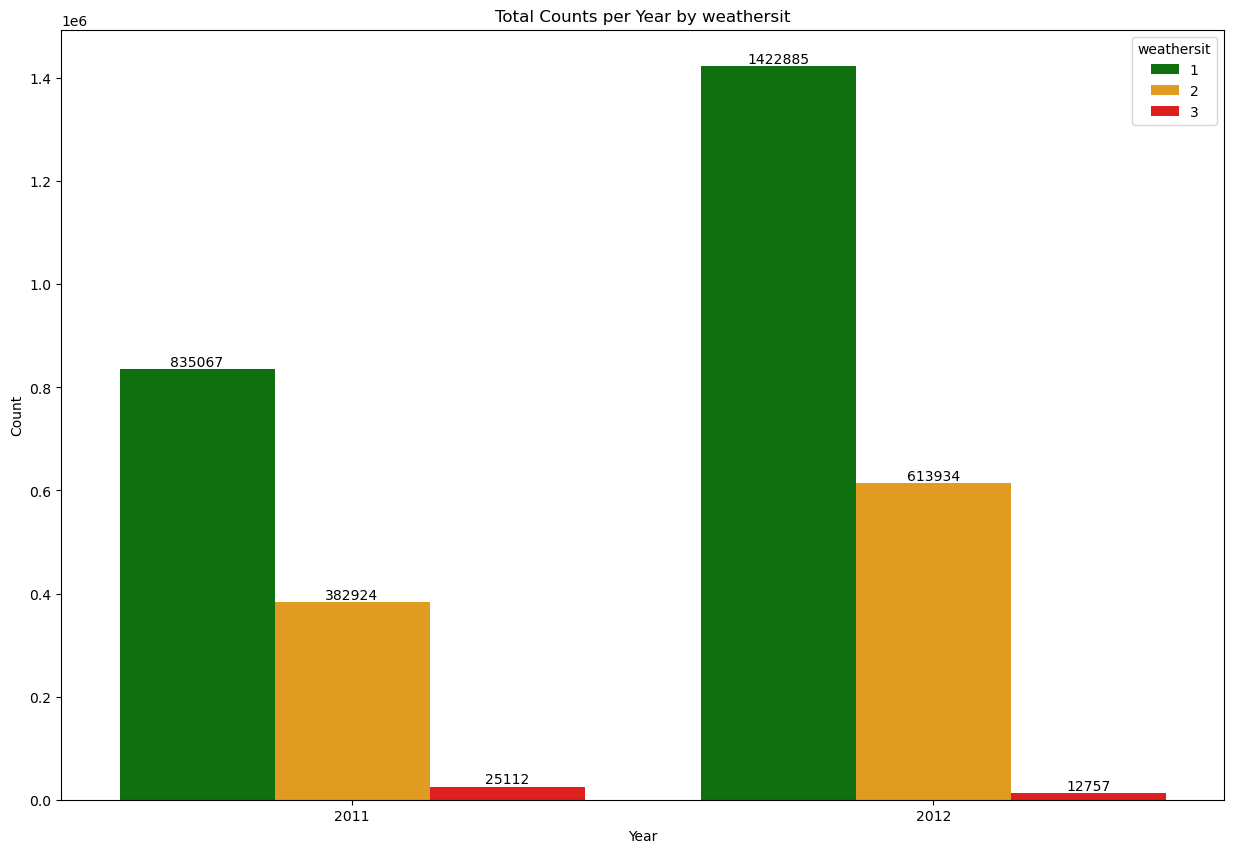

In [52]:
plt.figure(figsize=(15, 10))

ax = sns.barplot(x='year', y='count', hue='weathersit', data=month_rent_fix, errorbar=None, palette=custom_palette, estimator=sum)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 2, int(p.get_height()), ha='center', va='bottom', fontsize=10, color='black')

# Set title and labels
plt.title('Total Counts per Year by weathersit')
plt.xlabel('Year')
plt.ylabel('Count')

# Show the plot
plt.show()

Berdasarkan visualisasi di atas, dapat diketahui bahwasanya jumlah penyewa sepeda terbanyak dari keseluruhan yang ada pada dataset, yaitu ketika ada di weathersit 1 atau "Clear, Few clouds, Partly cloudy, Partly cloudy" pada tahun 2012. Dan setiap tahunnya juga, dapat diketahui bahwasanya ketika pada weathersit 3 atau 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', penyewa sepeda jauh lebih sedikit dibandingkan dengan kategori weathersit lainnya.

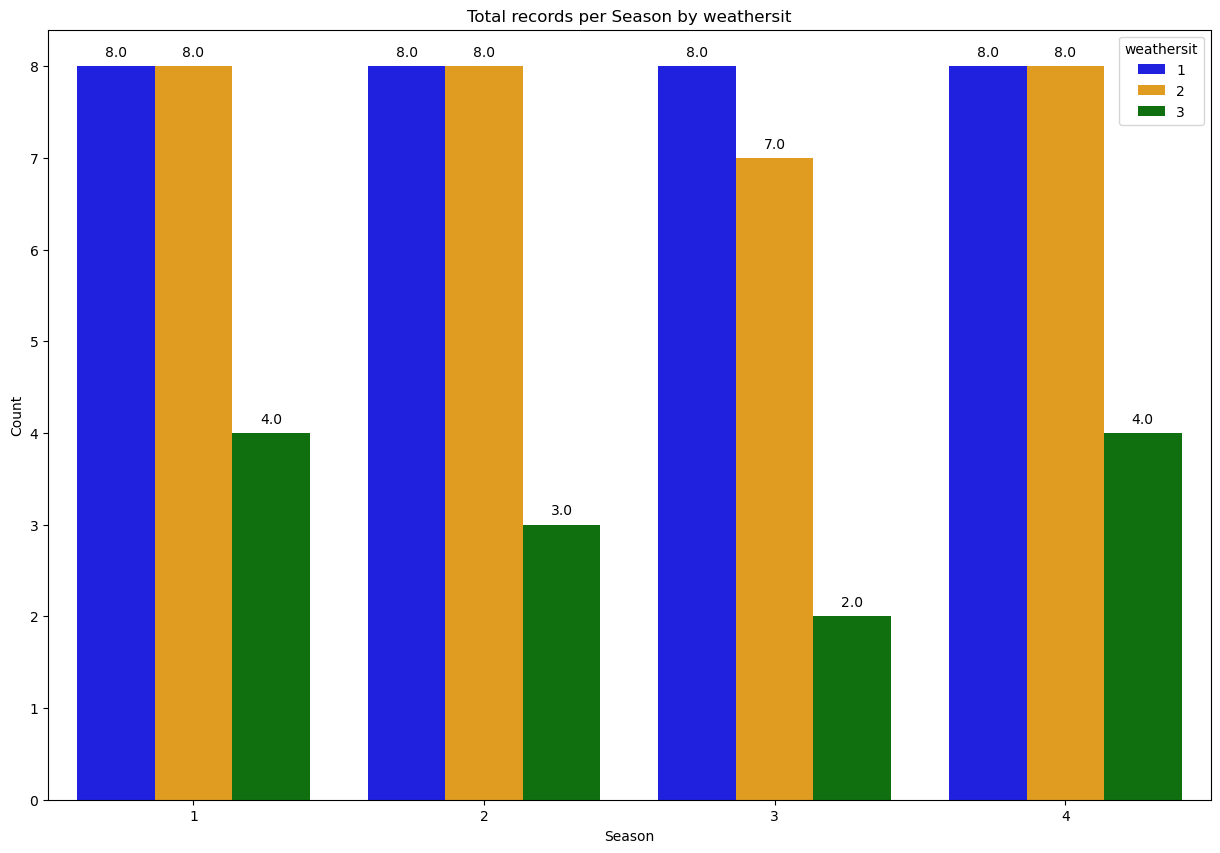

In [53]:
custom_palette = {1: 'blue', 2: 'orange', 3: 'green'}

plt.figure(figsize=(15, 10))

ax = sns.countplot(x='season', hue='weathersit', data=month_rent_fix, palette=custom_palette)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Set title and labels
plt.title('Total records per Season by weathersit')
plt.xlabel('Season')
plt.ylabel('Count')

# Show the plot
plt.show()

Berdasarkan visualisasi di atas dapat diketahui bahwa season 3 yang memiliki jumlah penyewa terbanyak sepanjang dataset didominasi oleh weathersit 1

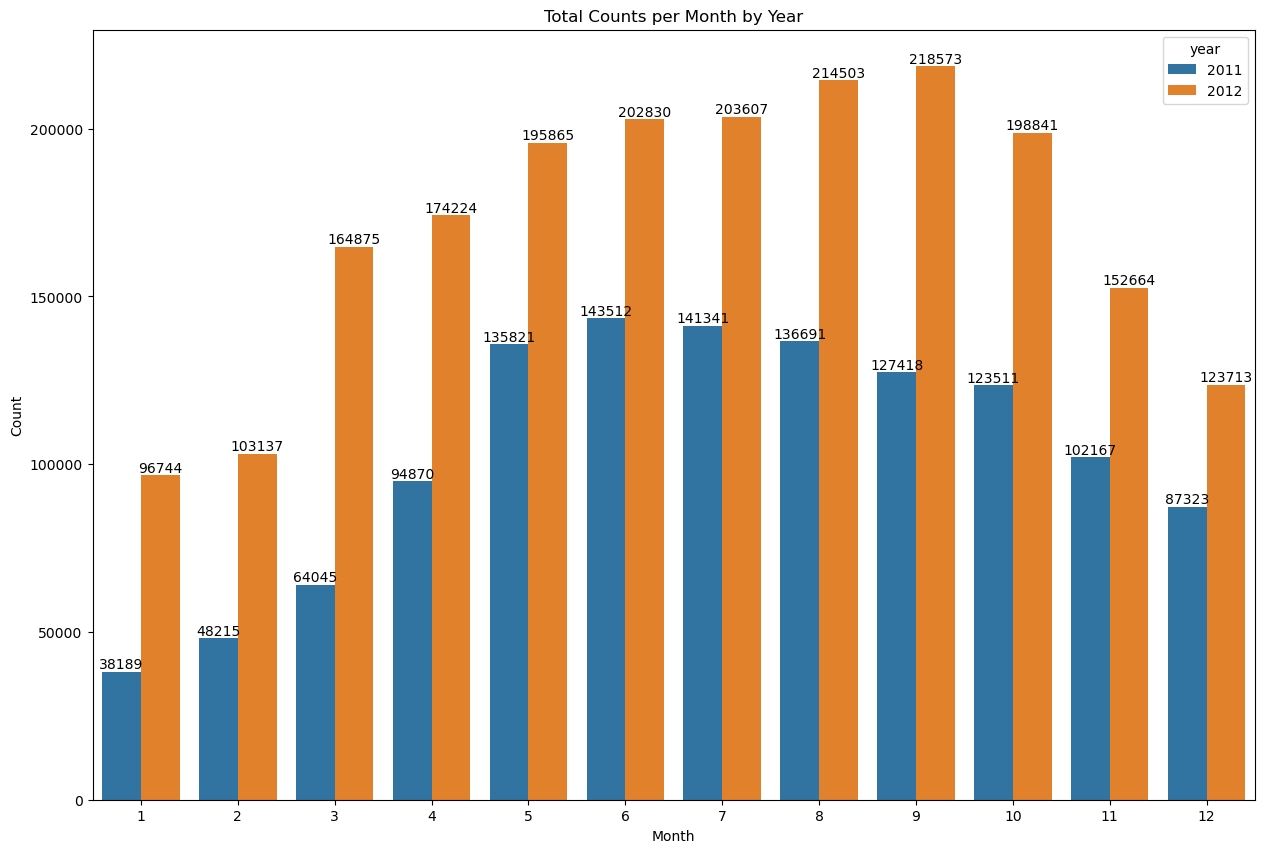

In [55]:
plt.figure(figsize=(15, 10))

ax = sns.barplot(x='month', y='count', hue='year', data=month_rent_fix, errorbar=None, estimator=sum)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 2, int(p.get_height()), ha='center', va='bottom', fontsize=10, color='black')

# Set title and labels
plt.title('Total Counts per Month by Year')
plt.xlabel('Month')
plt.ylabel('Count')

# Show the plot
plt.show()

In [56]:
month_rent_fix[['casual', 'registered']][(month_rent_fix['month'] == 9) & (month_rent_fix['year'] == '2012')].sum()

casual         43778
registered    174795
dtype: int64

Sesuai dengan analisis sebelumnya, dapat dijawab pertanyaan bisnis yang sudah diajukan di awal, yaitu:

1. Faktor apa saja yang dapat mempengaruhi pengguna dalam menyewa sepeda?
Jawaban: faktor-faktor yang dapat mempengaruhi pengguna dalam menyewa sepeda adalah temperature, sesason, dan weathersit

2. Pada waktu kapan terdapat penyewaan sepeda paling banyak dan paling sedikit?
Jawaban: penyewa sepeda terbanyak ada di tahun 2012 pada bulan 9 atau September, yang mana pada bulan tersebut merupakan musim "fall" atau musim gugur dan didominasi oleh kategori weathersit "Clear, Few clouds, Partly cloudy, Partly cloudy". Jumlah penyewa sepeda paling sedikit ada di tahun 2011 pada bulan 1 atau Januari, yang mana pada bulan tersebut merupakan musim "winter" atau musim dingin.

Langkah yang dapat diambil oleh perusahaan penyewa sepeda berdasarkan keseluruhan analisis yang dilakukan adalah sebagai berikut:

1. Perusahaan dapat memberikan harga promo bagi penyewaan sepeda kategori registered pada musim gugur kedepannya untuk menarik perhatian kategori casual agar beralih ke kategori registered

2. Untuk mengurangi biaya pengeluaran atau operasional, perusahaan penyewa sepeda dapat mengurangi jumlah sepeda yang disewakan pada musim dingin menuju musim semi. mengingat berdasarkan hasil analisis bahwa jumlah penyewa di kedua musim tersebut tidak terlalu banyak dibandingkan musim gugur dan musim panas